In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from pathlib import Path
import cv2 

In [4]:
# imgs = os.listdir(os.path.join(data_dir,'Andy_Roddick'))
# # Visualizing the histograms 
# for img in imgs:
#     image = cv2.imread(os.path.join(os.path.join(data_dir,'Andy_Roddick'),img))
    
#     imgLBP    = LBPimg(image)
#     vecLBP = imgLBP.flatten()

#     fig = plt.figure(figsize=(20,8))
#     ax = fig.add_subplot(1,3,1)
#     ax.imshow(image)
#     ax.set_title("gray scale image")
#     ax = fig.add_subplot(1,3,2)
#     ax.imshow(imgLBP,cmap="gray")
#     ax.set_title("LBP converted image")
#     ax = fig.add_subplot(1,3,3)
#     freq,lbp, _ = ax.hist(vecLBP,bins=2**8)
#     ax.set_ylim(0,30000)
#     lbp = lbp[:-1]
#     ax.set_title("LBP histogram")
#     plt.show()




In [5]:
def lbp_algo(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_lbp = np.zeros_like(gray)

    nn = 3 
    for ih in range(0,img.shape[0] - nn):
        for iw in range(0,img.shape[1] - nn):
            crp = gray[ih:ih+nn,iw:iw+nn]
            cntr = crp[1,1]
            imm = (crp >= cntr)*1.0
            imm_vec = imm.T.flatten()
            imm_vec = np.delete(imm_vec,4)
            pos_imm_vec = np.where(imm_vec)[0]
            if len(pos_imm_vec) >= 1:
                num = np.sum(2**pos_imm_vec)
            else:
                num = 0
            img_lbp[ih+1,iw+1] = num
    return img_lbp

In [6]:
data_dir = "test1"

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

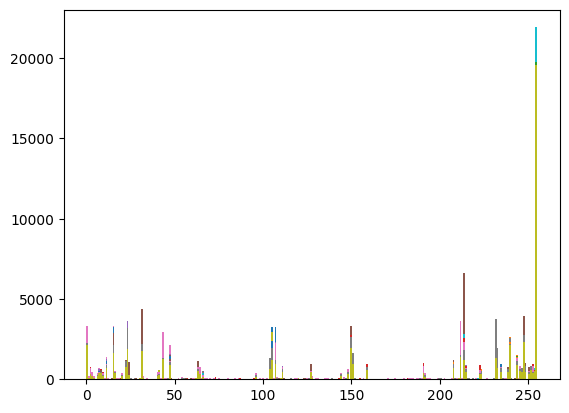

In [9]:
data = pd.DataFrame(columns=['path','class'])

for folder in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir,folder)):
        data.loc[len(data.index)] = [os.path.join(folder,img),folder] 
        
X = np.ndarray((len(data.index),256))
y = []

for i in range(len(data.index)):
    img = cv2.imread(os.path.join(data_dir,data['path'][i]))
    umg_lbp = lbp_algo(img)
    vec_lbp = umg_lbp.flatten()
    freq,_,_=plt.hist(vec_lbp,bins=2**8)
    X[i] = freq
    y.append(data['class'][i])
    
y = np.array(y)
suf_splt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 1)

for train_index, test_index in suf_splt.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
for train_index, val_index in suf_splt.split(X_train, y_train):
    X_train, X_val = X_train[train_index], X_train[val_index]
    y_train, y_val = y_train[train_index], y_train[val_index]


df_sv = pd.DataFrame(X_train)
df_sv.to_csv("train.csv")

df_sv = pd.DataFrame(X_val)
df_sv.to_csv("X_val.csv")

df_sv = pd.DataFrame(X_test)
df_sv.to_csv("X_test.csv")

df_sv = pd.DataFrame(y_train)
df_sv.to_csv("y_train.csv")

df_sv = pd.DataFrame(y_val)
df_sv.to_csv("y_val.csv")

df_sv = pd.DataFrame(y_test)
df_sv.to_csv("y_test.csv")